In [1]:
import pandas as pd
import numpy as np

### Прочитаем данные из Excel файла

In [2]:
df = pd.read_excel('data.xls')
df

,Unnamed: 0,широта,долгота,Абакан,Альметьевск,Анапа,Ангарск,Арзамас,Армавир,Арсеньев,...,Челябинск,Череповец,Чита,Шахты,Щёлково,Электросталь,Элиста,Южно-Сахалинск,Якутск,Ярославль
0,Абакан,53°43′,91°26′,,3391,5229,1421,4106,4979,5280,...,2686,4358,2552,4762,4451,4421,4653,6207,4648,4219
1,Альметьевск,54°54′,52°18′,3391,,1958,4061,717,1708,7920,...,693,1322,5192,1491,1058,1028,1382,8847,7288,1060
2,Анапа,44°53′,37°18′,5229,1958,,5899,1559,378,9758,...,2532,1961,7030,478,1498,1501,667,10685,9126,1745
3,Ангарск,52°34′,103°55′,1421,4061,5899,,4808,5682,3853,...,3389,5060,1125,5464,5153,5123,5355,4780,3221,4922
4,Арзамас,55°23′,43°50′,4106,717,1559,4808,,1456,8633,...,1406,763,5905,1096,499,469,1171,9560,8000,501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Электросталь,55°48′,38°27′,4421,1028,1501,5123,469,1394,8983,...,1722,495,6255,1034,38,,1291,9879,8320,278
192,Элиста,46°18′,44°15′,4653,1382,667,5355,1171,388,9215,...,1954,1751,6487,406,1288,1291,,10116,8557,1540
193,Южно-Сахалинск,46°58′,142°44′,6207,8847,10685,4780,9560,10437,2162,...,8143,9844,3648,10218,9910,9879,10116,,3898,9709
194,Якутск,62°01′,129°42′,4648,7288,9126,3221,8000,8878,2971,...,6583,8285,2089,8659,8351,8320,8557,3898,,8149


### Все города

In [3]:
cities = df.iloc[:, 0].to_numpy()
cities

array(['Абакан', 'Альметьевск', 'Анапа', 'Ангарск', 'Арзамас', 'Армавир',
       'Арсеньев', 'Артём', 'Архангельск', 'Астрахань', 'Ачинск',
       'Балаково', 'Балашиха', 'Барнаул', 'Батайск', 'Белгород',
       'Беломорск', 'Бердск', 'Березники', 'Бийск', 'Биробиджан',
       'Благовещенск', 'Братск', 'Брянск', 'Великие Луки',
       'Великий Новгород', 'Владивосток', 'Владикавказ', 'Владимир',
       'Волгоград', 'Волгодонск', 'Волжский', 'Вологда', 'Воркута',
       'Воронеж', 'Воскресенск', 'Воткинск', 'Глазов', 'Грозный',
       'Дербент', 'Дзержинск', 'Димитровград', 'Евпатория',
       'Екатеринбург', 'Елец', 'Ессентуки', 'Железногорск',
       'Железнодорожный', 'Жуковский', 'Зеленоград', 'Златоуст',
       'Иваново', 'Ижевск', 'Иркутск', 'Ишим', 'Йошкар-Ола', 'Казань',
       'Калининград', 'Калуга', 'Каменск-Уральский', 'Камышин', 'Канск',
       'Кемерово', 'Керчь', 'Киров', 'Киселёвск', 'Кисловодск', 'Клин',
       'Ковров', 'Коломна', 'Колпино', 'Комсомольск-на-Амуре', 'Ко

### Матрица расстояний между городами

In [4]:
dist_matrix = df.iloc[:, 3:].to_numpy()
for i in range(dist_matrix.shape[0]):
    dist_matrix[i, i] = -1
dist_matrix = dist_matrix.astype(np.int32)
dist_matrix, dist_matrix.shape

(array([[   -1,  3391,  5229, ...,  6207,  4648,  4219],
        [ 3391,    -1,  1958, ...,  8847,  7288,  1060],
        [ 5229,  1958,    -1, ..., 10685,  9126,  1745],
        ...,
        [ 6207,  8847, 10685, ...,    -1,  3898,  9709],
        [ 4648,  7288,  9126, ...,  3898,    -1,  8149],
        [ 4219,  1060,  1745, ...,  9709,  8149,    -1]]),
 (196, 196))

### Переведем долготу в x координату и убедимся, что они все различны

In [5]:
x_list = list(map(lambda x: int(x[:-1].split('°')[0]) * 60 + int(x[:-1].split('°')[1]), df['долгота'].to_list()))

In [6]:
len(x_list) == len(np.unique(x_list))

True

### Отсортируем города с запада на восток

In [7]:
order = np.argsort(x_list)
cities[order]

array(['Калининград', 'Псков', 'Санкт-Петербург', 'Великие Луки',
       'Колпино', 'Великий Новгород', 'Смоленск', 'Мурманск', 'Евпатория',
       'Севастополь', 'Симферополь', 'Петрозаводск', 'Брянск',
       'Беломорск', 'Железногорск', 'Тверь', 'Орёл', 'Курск', 'Калуга',
       'Керчь', 'Белгород', 'Обнинск', 'Клин', 'Зеленоград', 'Одинцово',
       'Анапа', 'Красногорск', 'Серпухов', 'Химки', 'Подольск', 'Тула',
       'Москва', 'Новороссийск', 'Мытищи', 'Старый Оскол', 'Королёв',
       'Пушкино', 'Люберцы', 'Череповец', 'Балашиха', 'Щёлково',
       'Железнодорожный', 'Жуковский', 'Сергиев Посад', 'Узловая',
       'Раменское', 'Новомосковск', 'Ногинск', 'Электросталь', 'Елец',
       'Воскресенск', 'Коломна', 'Рыбинск', 'Таганрог', 'Орехово-Зуево',
       'Краснодар', 'Воронеж', 'Липецк', 'Ростов-на-Дону', 'Рязань',
       'Сочи', 'Батайск', 'Северодвинск', 'Ярославль', 'Вологда',
       'Новошахтинск', 'Новочеркасск', 'Майкоп', 'Шахты', 'Владимир',
       'Архангельск', 'Костр

### Сам алгоритм решения задачи

In [8]:
computed = np.full((len(cities), len(cities), len(cities)), -1)
computed_route = np.full((len(cities), len(cities), len(cities)), None)


def dist(a, b):
    first_idx = order[a]
    second_idx = order[b]
    return dist_matrix[first_idx, second_idx]


def fun(current, target, last_back):
    if target == len(cities) - 1:
        return dist(current, target) + dist(target, last_back), [target]
    if computed[current, target, last_back] != -1:
        return computed[current, target, last_back], computed_route[current, target, last_back]
    accept_next_cost, accept_next_route = fun(target, target + 1, last_back)
    accept_next_cost += dist(current, target)
    skip_next_cost, skip_next_route = fun(current, target + 1, target)
    skip_next_cost += dist(last_back, target)
    if accept_next_cost < skip_next_cost:
        computed[current, target, last_back] = accept_next_cost
        new_accept_next_route = accept_next_route.copy()
        new_accept_next_route.append(target)
        computed_route[current, target, last_back] = new_accept_next_route
    else:
        computed[current, target, last_back] = skip_next_cost
        computed_route[current, target, last_back] = skip_next_route.copy()
    return computed[current, target, last_back], computed_route[current, target, last_back]

### Запускаем вычисление. Выводится время работы алгоритма

In [9]:
%%time

total_cost, route = fun(0, 1, 0)

Wall time: 91.9 ms


### Длина кратчайшего битонического маршрута

In [10]:
total_cost

95055

### Формируем последовательность городов в кратчайшем битоническом маршруте

In [11]:
route.reverse()
total_forward_route = cities[order[[0] + route]]
mask = np.ones(order.shape[0], dtype=bool)
mask[route[:-1]] = False
total_backward_route = cities[order[mask]][::-1]

### Последовательность городов в первой части маршрута

In [12]:
total_forward_route

array(['Калининград', 'Великие Луки', 'Смоленск', 'Евпатория',
       'Севастополь', 'Симферополь', 'Брянск', 'Орёл', 'Курск',
       'Белгород', 'Обнинск', 'Клин', 'Зеленоград', 'Одинцово',
       'Красногорск', 'Серпухов', 'Химки', 'Подольск', 'Тула', 'Москва',
       'Мытищи', 'Королёв', 'Пушкино', 'Люберцы', 'Череповец', 'Балашиха',
       'Щёлково', 'Железнодорожный', 'Жуковский', 'Сергиев Посад',
       'Раменское', 'Ногинск', 'Электросталь', 'Воскресенск', 'Коломна',
       'Рыбинск', 'Орехово-Зуево', 'Воронеж', 'Липецк', 'Рязань',
       'Северодвинск', 'Ярославль', 'Вологда', 'Владимир', 'Архангельск',
       'Кострома', 'Иваново', 'Ковров', 'Тамбов', 'Муром', 'Дзержинск',
       'Арзамас', 'Нижний Новгород', 'Элиста', 'Волгоград', 'Волжский',
       'Пенза', 'Саранск', 'Камышин', 'Саратов', 'Кузнецк', 'Чебоксары',
       'Новочебоксарск', 'Балаково', 'Йошкар-Ола', 'Казань', 'Киров',
       'Сыктывкар', 'Нарьян-Мар', 'Кудымкар', 'Пермь', 'Соликамск',
       'Березники', 'Кунгу

### Последовательность городов во второй части маршрута

In [13]:
total_backward_route

array(['Магадан', 'Южно-Сахалинск', 'Комсомольск-на-Амуре', 'Хабаровск',
       'Арсеньев', 'Биробиджан', 'Находка', 'Артём', 'Уссурийск',
       'Владивосток', 'Благовещенск', 'Кызыл', 'Минусинск', 'Абакан',
       'Ачинск', 'Междуреченск', 'Новокузнецк', 'Прокопьевск',
       'Киселёвск', 'Бийск', 'Барнаул', 'Бердск', 'Новосибирск',
       'Рубцовск', 'Омск', 'Ишим', 'Тобольск', 'Тюмень', 'Курган',
       'Каменск-Уральский', 'Челябинск', 'Екатеринбург', 'Миасс',
       'Златоуст', 'Магнитогорск', 'Орск', 'Уфа', 'Стерлитамак',
       'Салават', 'Оренбург', 'Нефтекамск', 'Чайковский', 'Воткинск',
       'Сарапул', 'Октябрьский', 'Ижевск', 'Глазов', 'Набережные Челны',
       'Альметьевск', 'Нижнекамск', 'Самара', 'Новокуйбышевск',
       'Димитровград', 'Тольятти', 'Сызрань', 'Ульяновск', 'Дербент',
       'Астрахань', 'Махачкала', 'Харабали', 'Хасавюрт', 'Грозный',
       'Назрань', 'Владикавказ', 'Нарткала', 'Нальчик', 'Пятигорск',
       'Ессентуки', 'Кисловодск', 'Волгодонск', 'Ст

### Проверки

In [14]:
len(total_forward_route) + len(total_backward_route) == 198

True

In [15]:
cycle_route = list(total_forward_route) + list(total_backward_route[1:-1])
len(cycle_route), len(np.unique(cycle_route))

(196, 196)

## Визуализация

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
plt.rcParams['pdf.fonttype'] = 42

In [17]:
edge_lat_list = []
edge_lon_list = []

In [18]:
coords = df.iloc[list(cities).index('Калининград'), 1:3]
a = list(map(int, coords[0][:-1].split('°')))
lat = a[0] + a[1] / 60
b = list(map(int, coords[1][:-1].split('°')))
lon = b[0] + b[1] / 60
edge_lat_list.append(lat)
edge_lon_list.append(lon)

coords = df.iloc[list(cities).index('Магадан'), 1:3]
a = list(map(int, coords[0][:-1].split('°')))
lat = a[0] + a[1] / 60
b = list(map(int, coords[1][:-1].split('°')))
lon = b[0] + b[1] / 60
edge_lat_list.append(lat)
edge_lon_list.append(lon)

In [19]:
forward_lat_list = []
forward_lon_list = []

for city in total_forward_route[1:-1]:
    coords = df.iloc[list(cities).index(city), 1:3]
    a = list(map(int, coords[0][:-1].split('°')))
    lat = a[0] + a[1] / 60
    b = list(map(int, coords[1][:-1].split('°')))
    lon = b[0] + b[1] / 60
    forward_lat_list.append(lat)
    forward_lon_list.append(lon)

In [20]:
backward_lat_list = []
backward_lon_list = []

for city in total_backward_route[1:-1]:
    coords = df.iloc[list(cities).index(city), 1:3]
    a = list(map(int, coords[0][:-1].split('°')))
    lat = a[0] + a[1] / 60
    b = list(map(int, coords[1][:-1].split('°')))
    lon = b[0] + b[1] / 60
    backward_lat_list.append(lat)
    backward_lon_list.append(lon)

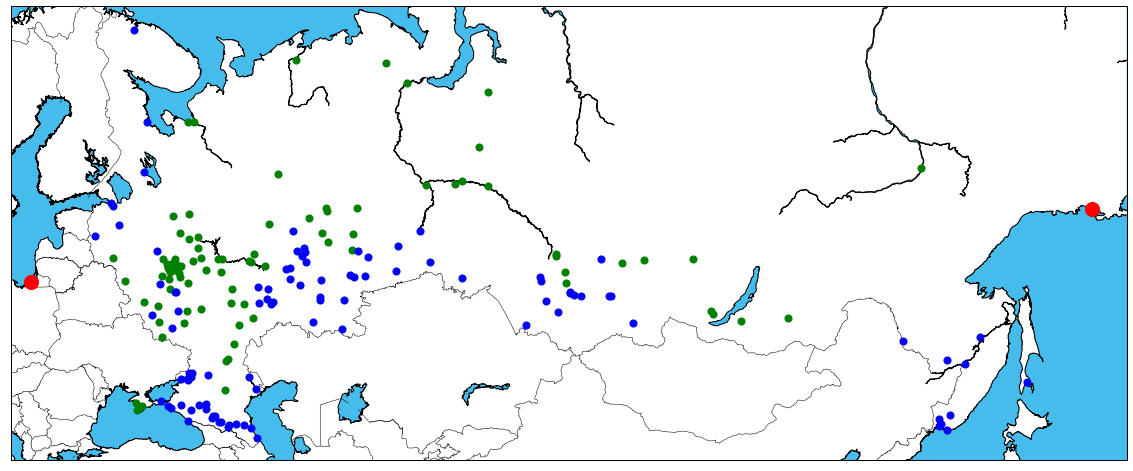

In [21]:
fig = plt.figure(figsize=(20, 20))
m = Basemap(llcrnrlon=18,
            llcrnrlat=40,
            urcrnrlon=155,
            urcrnrlat=70,
            projection='merc',
            resolution='f',
            area_thresh=10000.)
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='white', lake_color='#46bcec')
edge_lons, edge_lats = m(edge_lon_list, edge_lat_list)
forward_lons, forward_lats = m(forward_lon_list, forward_lat_list)
backward_lons, backward_lats = m(backward_lon_list, backward_lat_list)
m.scatter(edge_lons, edge_lats, marker = 'o', color='r', s=200, zorder=10)
m.scatter(forward_lons, forward_lats, marker = 'o', color='green', s=50, zorder=10)
m.scatter(backward_lons, backward_lats, marker = 'o', color='blue', s=50, zorder=10)
plt.show()